In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/content/student.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#Features in the dataset
school- student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)
address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1: < 15 minutes, 2: 15-30 minutes, 3: 30 minutes - 1 hour, 4: > 1 hour)

studytime - weekly study time (numeric: 1: < 2 hours, 2: 2-5 hours, 3: 5-10 hours, 4: > 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: 
from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

#Checking for missing values


In [88]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#Finding duplicated data

In [89]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


#Exploratory Data Analysis

##Because there are many variables, we need to look at the correlation of the target variable with several predictors, so that we can know which variables have a significant effect on the target variable.

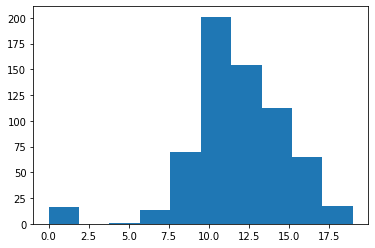

In [90]:
plt.hist(data['G3'])
plt.show()

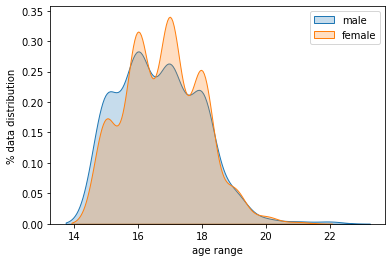

In [91]:
sns.kdeplot(data.groupby('sex').get_group('M')['age'], shade = True, label='male')
sns.kdeplot(data.groupby('sex').get_group('F')['age'], shade = True, label='female')
plt.xlabel('age range')
plt.ylabel("% data distribution")
plt.legend()
plt.show()

From the graph we can understand that student range is around 14 until 22.

In average, female student is more than male student


In [92]:
def create_sex_corr_plot(params):
    sns.kdeplot(data.groupby('sex').get_group('M')[params], shade = True, label='male')
    sns.kdeplot(data.groupby('sex').get_group('F')[params], shade = True, label='female')
    plt.xlabel(f'{params} range')
    plt.ylabel("% data distribution")
    plt.legend()
    plt.show()
    

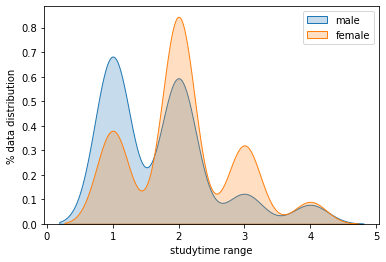

In [93]:
create_sex_corr_plot("studytime")

From the diagram of the relationship between age, gender and the final score, it can be seen that the highest and lowest scores of male students are higher than female, and the median value of the age of male students is greater than female. However, the median value of the final grades of both male and female students was almost the same.

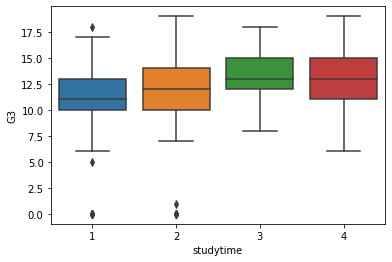

In [94]:
sns.boxplot(x=data['studytime'],y=data['G3'])

The studytime predictor consists of 4 classes classified based on the length of study time in a week, and from the diagram above, it can be seen that there is a slight tendency for an increase in the mean final grade along with the increase in weekly study hours.



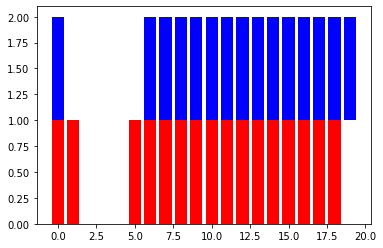

In [95]:
plt.bar(data.G3,data['romantic']=='yes', color='r')
plt.bar(data.G3, data['romantic']=='no', bottom=(data['romantic']=='no'), color='b')
plt.show()

In [96]:
data.corr() #Finding the correlation matrix of the dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


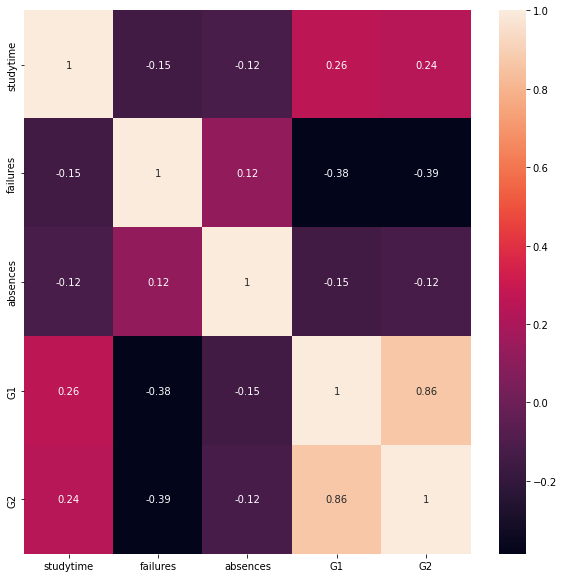

In [97]:
best_features=['studytime','failures', 'absences', 'G1', 'G2'] #From the above correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(data[best_features].corr(), annot=True, cbar=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

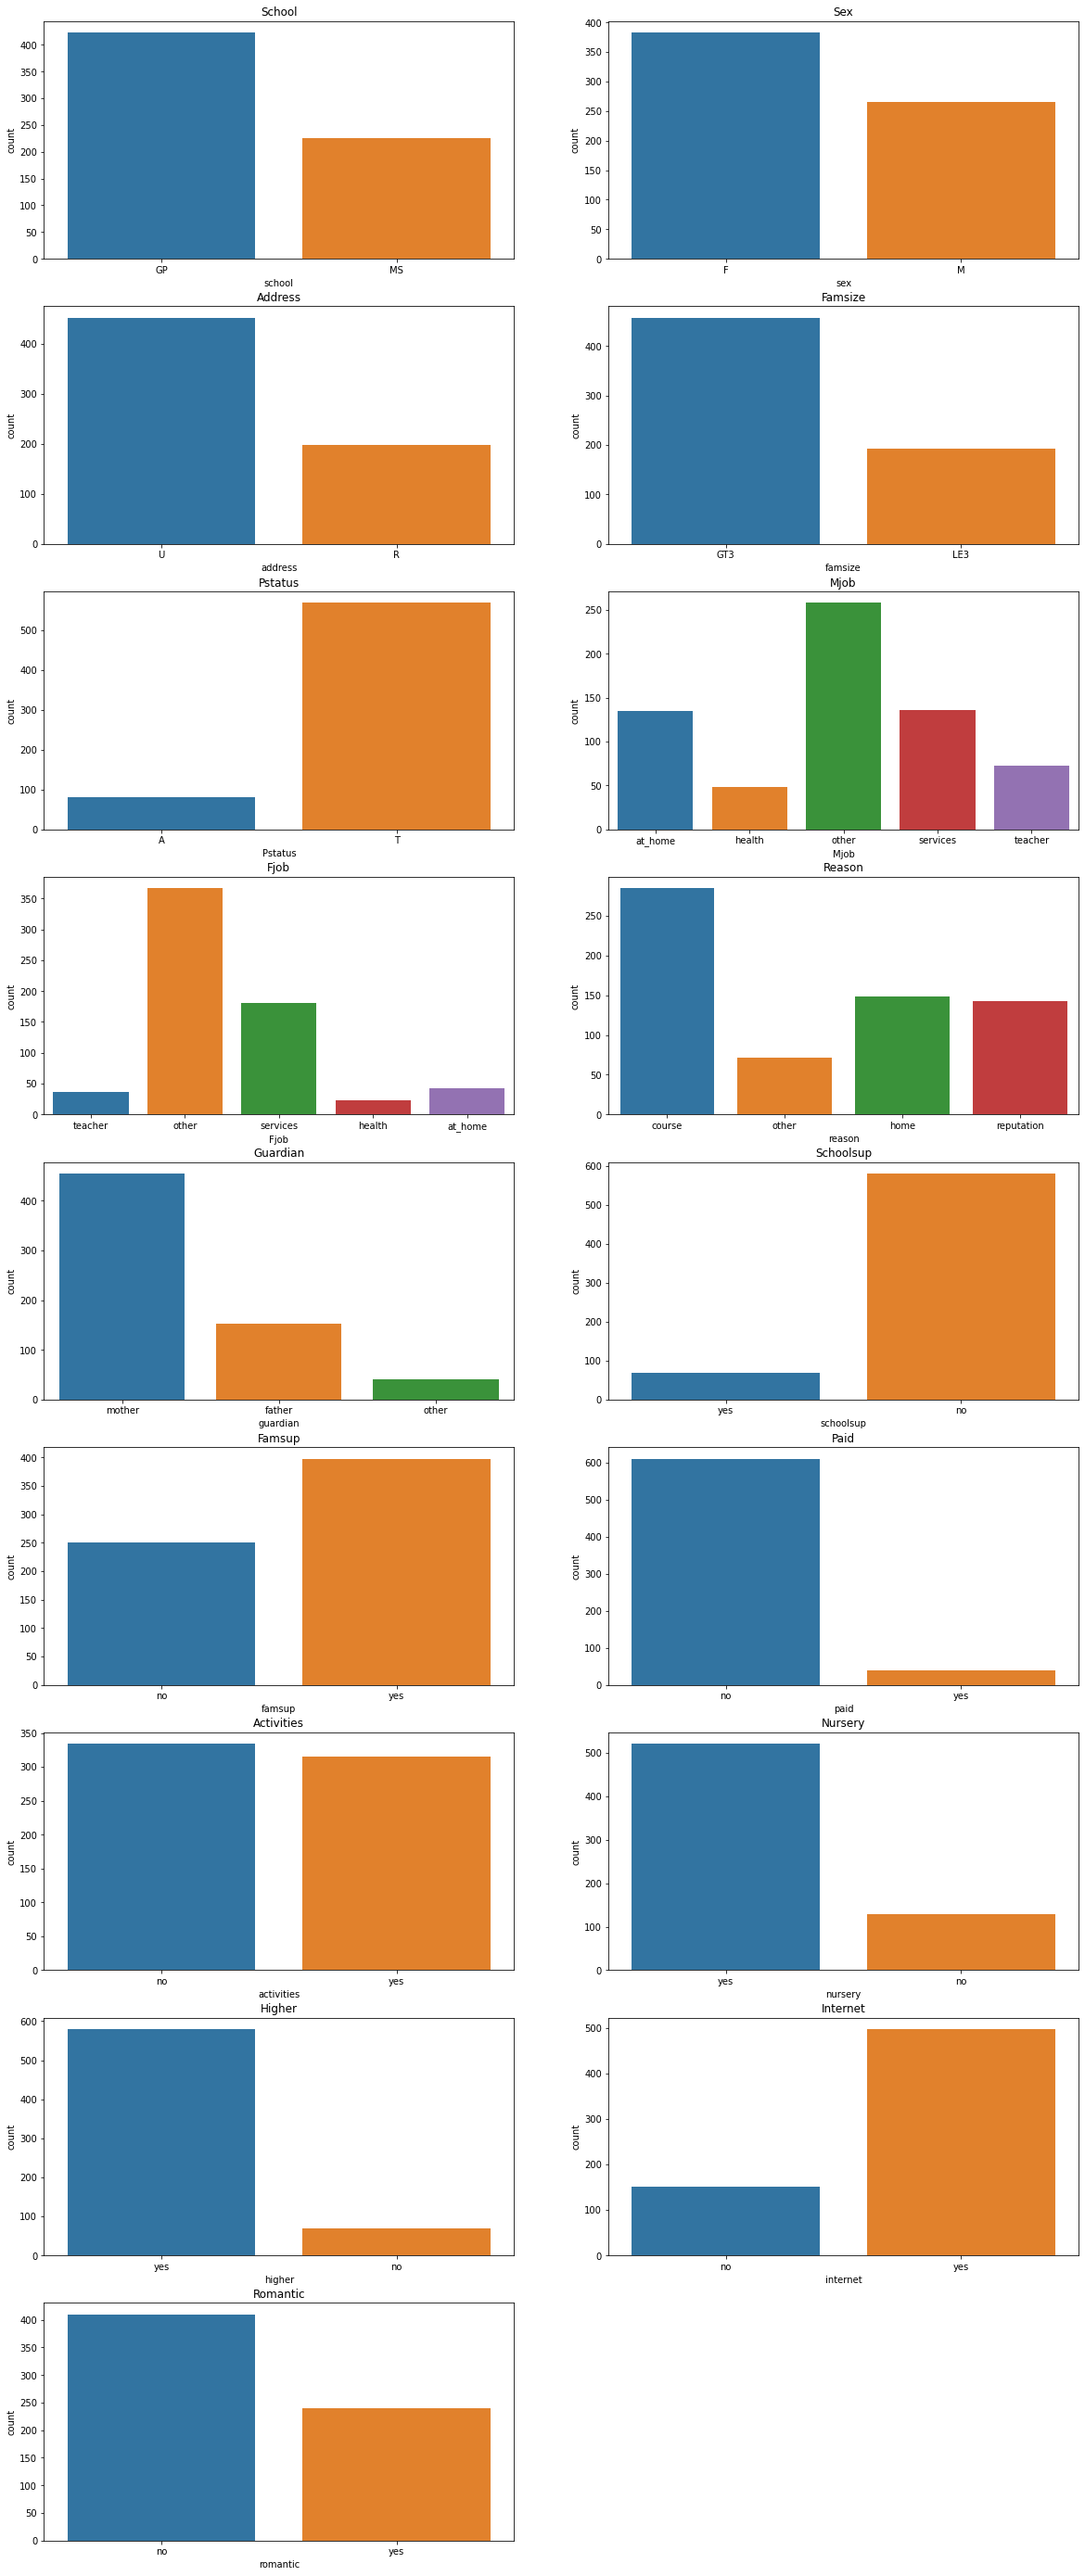

In [98]:
objects = data.dtypes=='object'
objects_col = objects[objects].index
obj_col = list(objects_col)
obj_col
plt.figure(figsize=(20,50))
for idx, name in enumerate(obj_col):
    plt.subplot(9, 2, idx+1)
    sns.countplot(data[name])
    plt.title(name.title())
    
plt.show()

###Parents and Grade Correlation

In [99]:
# Father job
data.groupby("Fjob")['G1'].median()

Fjob
at_home     10.0
health      11.0
other       11.0
services    11.0
teacher     13.0
Name: G1, dtype: float64

In [100]:
# Mother job
data.groupby("Mjob")['G1'].median()

Mjob
at_home     10.0
health      12.0
other       11.0
services    11.0
teacher     13.0
Name: G1, dtype: float64

In [101]:
def common_comparison(params, grade='G1'):
    order_by = data.groupby(params)[grade].median().sort_values(ascending = False).index
    sns.boxplot(x = data[params], y = data[grade], order = order_by)
    plt.xticks(rotation=90)
    plt.title(f"{params} v/s {grade}")

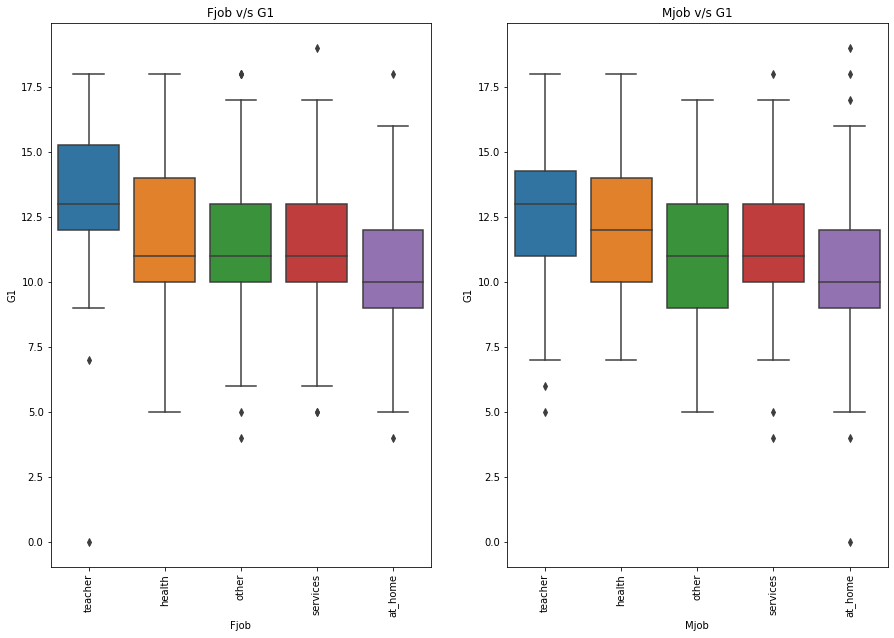

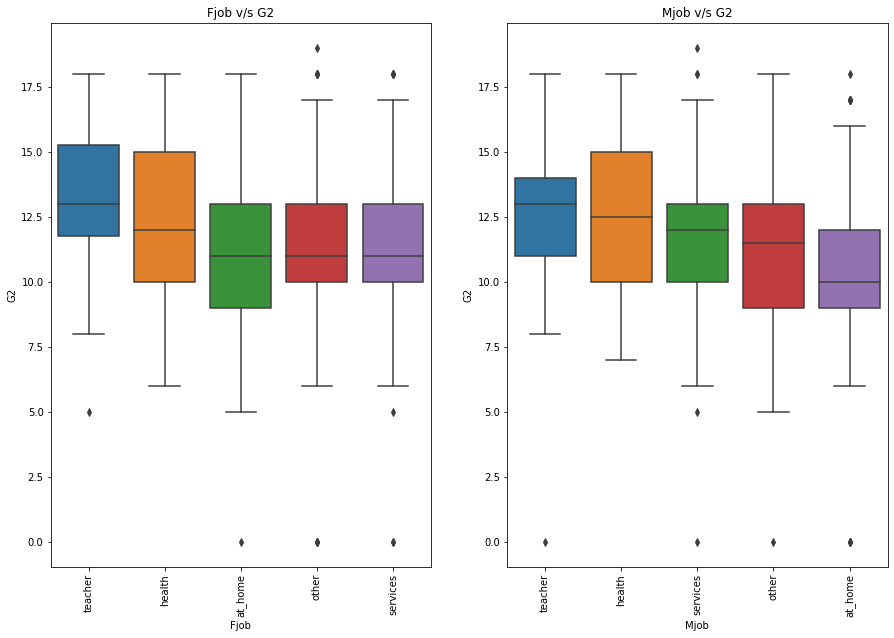

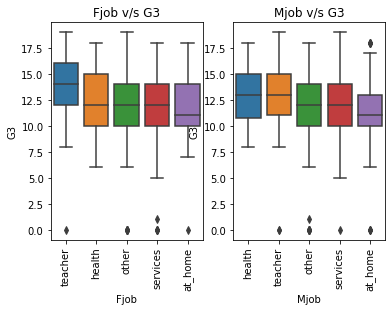

In [102]:
parents_job = ['Fjob', 'Mjob']

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_job):
    plt.subplot(1, 2, idx+1)
    common_comparison(name)

plt.show()

plt.figure(figsize=(15,10))
    
for idx, name in enumerate(parents_job):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G2')
    
plt.show()

for idx, name in enumerate(parents_job):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G3')
    
plt.show()



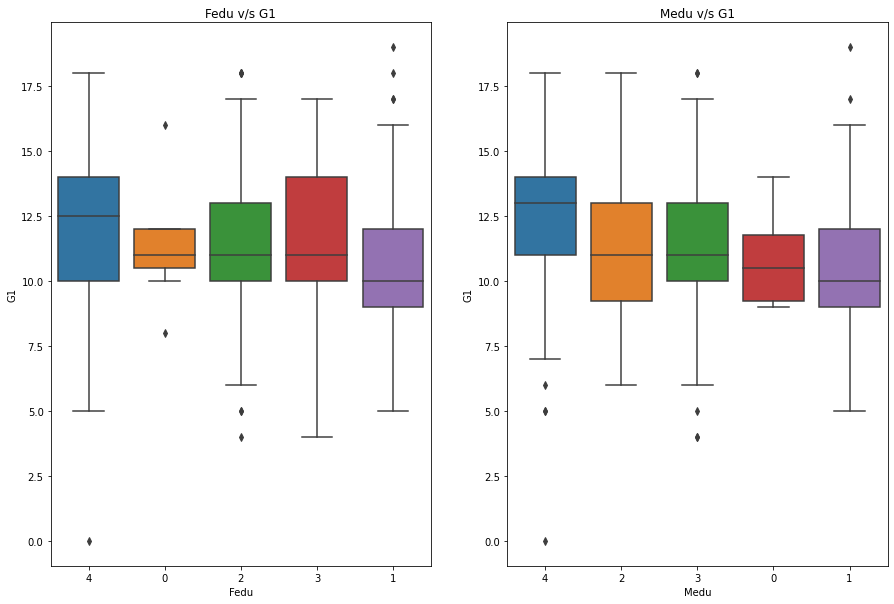

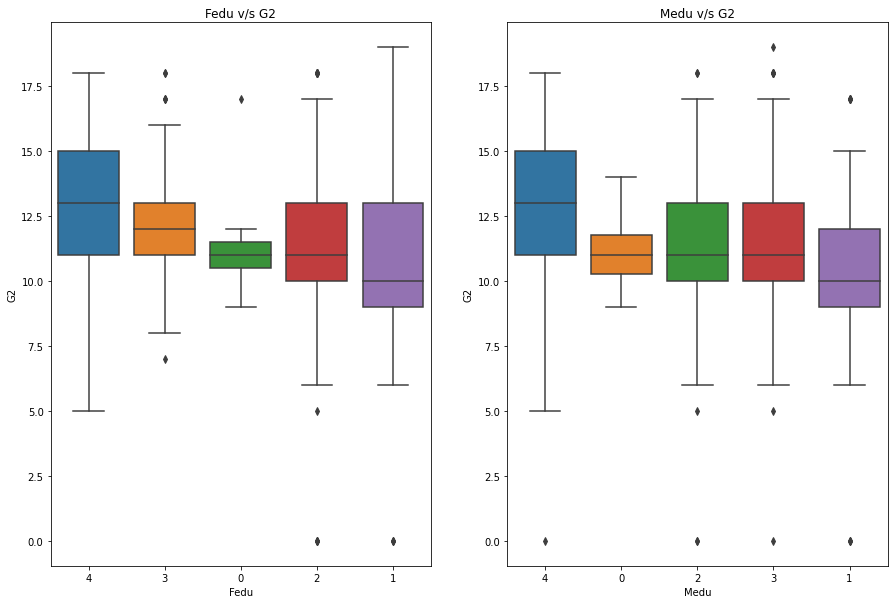

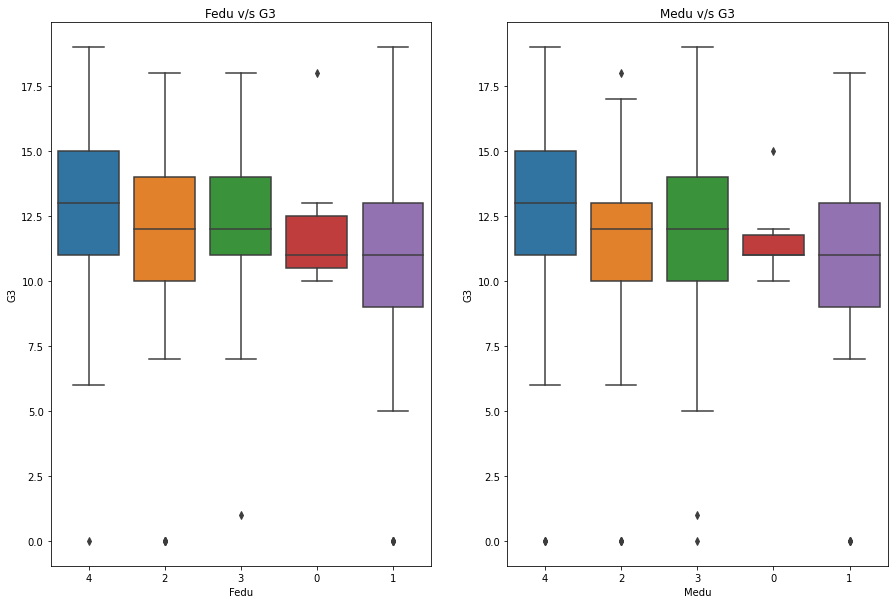

In [103]:
parents_edu = ['Fedu', 'Medu']

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_edu):
    plt.subplot(1, 2, idx+1)
    common_comparison(name)
    plt.xticks(rotation=0)

plt.show()

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_edu):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G2')
    plt.xticks(rotation=0)

plt.show()

plt.figure(figsize=(15,10))

for idx, name in enumerate(parents_edu):
    plt.subplot(1, 2, idx+1)
    common_comparison(name, 'G3')
    plt.xticks(rotation=0)

plt.show()

Comparing the external factors

#Machine Learning Models 

In [104]:
# Data split
from sklearn.model_selection import train_test_split

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
from sklearn.linear_model import LinearRegression

# Metrics Accuracy
from sklearn.metrics import r2_score

In [105]:
df_ml=data[['studytime','failures', 'absences','Dalc', 'Walc','health', 'G1', 'G2','G3']]


##Random Forest Regression

In [106]:
X_rf = df_ml.iloc[:, :-1].values
y_rf = df_ml.iloc[:, -1].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 0)

In [108]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [109]:
y_rf_pred = rf_model.predict(X_test)

In [110]:
rf_score = (r2_score(y_test, y_rf_pred))

In [111]:
print("Random Forest Score:", rf_score)

Random Forest Score: 0.7717689031967775


##Linear Regression


In [112]:
X_lr = df_ml.iloc[:, :-1].values
y_lr = df_ml.iloc[:, -1].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_lr_pred = lr_model.predict(X_test)

In [114]:
lr_score = (r2_score(y_test, y_lr_pred))

In [115]:
print("Linear Regression Score:", lr_score)

Linear Regression Score: 0.8269522000660667


##Model Comparison


In [116]:
model_data = [['Random Forest', rf_score], ['Linear Regression', lr_score]]

In [117]:
df_model = pd.DataFrame(model_data, columns=['Algorithm', 'Score'])

In [118]:
df_model

,Algorithm,Score
0,Random Forest,0.771769
1,Linear Regression,0.826952


As we can see together, the best algorithm to predict grade score in this case is Linear Regression with 0.83 accuracy in the predictions.